# Impact of Lockdown on Mobile Data Speeds

**Motivation:** To understand how mobile data speed varied across india and different TSPs during lockdown months

I will be mainly carrying out a exploratory data analysis in this project with emphasis on visually summarising trends and statistics

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.style.use('ggplot')

## Reading in Data

In [3]:
months = ['march','april','may','june','july']
years = [18,19,20]
file_name = [m+str(y)+'_publish.csv' for m in months for y in years] #The file name contains _publish
headers = ['month-year','tsp','tech','test_type','data_speed','signal_strength','lsa']

In [4]:
df = pd.DataFrame([], columns=headers)
for file in file_name:
    try:
        data = pd.read_csv(file, header=None)
        data.columns = headers[1:]
        data['month-year'] = file[0:-12]
        df   = pd.concat([df, data], axis=0)
    except FileNotFoundError:
        continue

/Users/anirudhchandra/anaconda3/envs/machine_learning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Preprocessing

In [5]:
#summarising the extent of empty/missing values in the dataframe
df.isnull().sum()*100/df.shape[0]

month-year         0.000000
tsp                0.000000
tech               0.000006
test_type          0.000006
data_speed         0.000006
signal_strength    0.000006
lsa                6.933114
dtype: float64

In [6]:
#Cleaning unwanted header from the dataframe
df = df.drop(index=df.loc[df.tsp=='Service Provider'].index)

In [7]:
#cleaning empty values from the dataframe
df = df.drop(index=df.loc[df.tsp=='\x1a'].index)

In [8]:
#Removing empty values from lsa
df = df.drop(index=df.loc[df.lsa.isnull()].index)

In [9]:
#Resetting the index
df = df.reset_index(drop=True)

In [10]:
#Reformatting the datatypes of numerical data
df.data_speed = df.data_speed.astype(float)

In [11]:
#Replacing 'na' with np.nan in signal_strength feature
df.loc[df.signal_strength=='na', 'signal_strength'] = np.nan

In [12]:
#Reformatting the signal_strength feature
df.signal_strength = df.signal_strength.astype(float)

In [13]:
#Adding two new features
df['year'] = df['month-year'].apply(lambda x: 2018 if '18' in x else
                                              2019 if '19' in x else
                                              2020 if '20' in x else 0)
df['month'] = df['month-year'].apply(lambda x: 'March' if 'march' in x else
                                               'April' if 'april' in x else
                                               'May' if 'may' in x else
                                               'June' if 'june' in x else
                                               'July' if 'july' in x else 0)

In [14]:
df.isnull().sum()

month-year              0
tsp                     0
tech                    0
test_type               0
data_speed              0
signal_strength    858719
lsa                     0
year                    0
month                   0
dtype: int64

Since there are large number of empty values in signal_strength, we will not remove them.

In [15]:
df = df.drop(columns=['month-year'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8985844 entries, 0 to 8985843
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   tsp              object 
 1   tech             object 
 2   test_type        object 
 3   data_speed       float64
 4   signal_strength  float64
 5   lsa              object 
 6   year             int64  
 7   month            object 
dtypes: float64(2), int64(1), object(5)
memory usage: 548.5+ MB


In [17]:
df.head()

,tsp,tech,test_type,data_speed,signal_strength,lsa,year,month
0,JIO,4G,Upload,7.31,-65.0,Andhra Pradesh,2018,March
1,JIO,4G,Upload,6.91,-65.0,Andhra Pradesh,2018,March
2,VODAFONE,4G,Download,7.73,-90.0,Maharashtra,2018,March
3,VODAFONE,4G,Download,6.92,-90.0,Maharashtra,2018,March
4,VODAFONE,4G,Download,7.69,-87.0,Maharashtra,2018,March


## Exploratory Data Analysis

In [18]:
#Splitting the data into three dataframes for the three years
df_18 = df.loc[df['year']==2018]
df_19 = df.loc[df['year']==2019]
df_20 = df.loc[df['year']==2020]

### Number of speed checks

In [19]:
#Number of speed checks in 2018
num_spd_chk_18 = df_18.groupby('month').count().drop(columns=['year']).tsp
num_spd_chk_18 = num_spd_chk_18[['March','April','May','June','July']]
#Number of speed checks in 2019
num_spd_chk_19 = df_19.groupby('month').count().drop(columns=['year']).tsp
num_spd_chk_19 = num_spd_chk_19[['March','April','May','June','July']]
#Number of speed checks in 2020
num_spd_chk_20 = df_20.groupby('month').count().drop(columns=['year']).tsp
num_spd_chk_20 = num_spd_chk_20[['March','April','May','June']]
num_spd_chk_20['July'] = 0

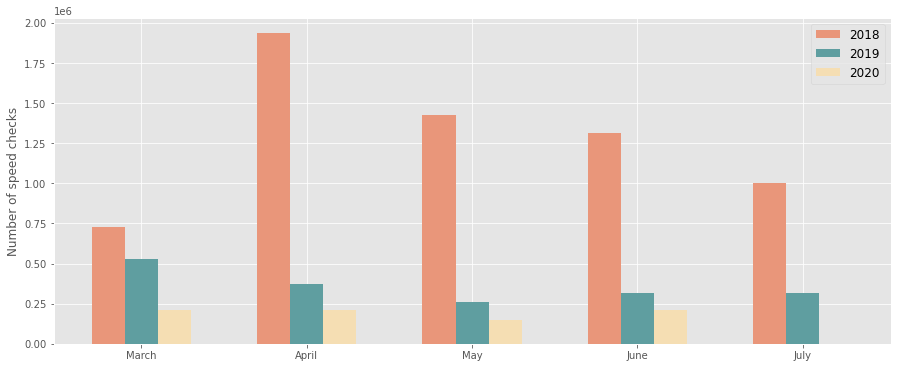

In [20]:
fig,ax = plt.subplots(figsize=[15,6])

dataset = [num_spd_chk_18, num_spd_chk_19, num_spd_chk_20]
months = ['March','April','May','June','July']
colors = ['darksalmon','cadetblue','wheat']

barwidth = 0.2
ticks1 = np.arange(0,5)
ticks2 = [x + barwidth for x in ticks1]
ticks3 = [x + barwidth for x in ticks2]

plt.bar(ticks1, num_spd_chk_18.values, width=barwidth,  label='2018', color=colors[0])
plt.bar(ticks2, num_spd_chk_19.values, width=barwidth,  label='2019', color=colors[1])
plt.bar(ticks3, num_spd_chk_20.values, width=barwidth,  label='2020', color=colors[2])

plt.xticks(ticks2, months)
plt.ylabel('Number of speed checks')
plt.legend(fontsize=12)
plt.show()

### Plotting speed checkk chloropleth for Indian state

In [21]:
import geopandas as gpd

In [22]:
india = gpd.read_file('Indian_States.shp')

In [23]:
india.st_nm.unique()

array(['Andaman & Nicobar Island', 'Arunanchal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadara & Nagar Havelli',
       'Daman & Diu', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'NCT of Delhi', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Odisha',
       'Andhra Pradesh'], dtype=object)

In [28]:
#Function to select available states and plot choropleth
def speed_check_chloropleth(df, india, title):
    lsa = df.lsa.value_counts()
    #Cleaning the reindexing
    lsa['Uttar Pradesh'] = lsa['UP East'] + lsa['UP West']
    lsa['Odisha'] = lsa['Orissa']
    #Dropping cities
    lsa = lsa.drop(index = ['UP East','UP West','Mumbai','Kolkata', 'Chennai', 'Orissa'])
    #Imputing speed check counts to geopandas dataframe
    for state in india.st_nm:
        try:
            india.loc[india.st_nm==state, 'count'] = lsa[state]

        except KeyError:

            exception1 = ((state=='Arunanchal Pradesh')|(state=='Assam')|(state=='Manipur')|
                         (state=='Meghalaya')|(state=='Mizoram')|(state=='Nagaland')|
                         (state=='Sikkim')|(state=='Tripura'))
            exception2 = (state=='NCT of Delhi')

            if exception1:
                india.loc[india.st_nm==state, 'count'] = lsa['North East']
            elif exception2:
                india.loc[india.st_nm==state, 'count'] = lsa['Delhi']

            else:
                continue
    india = india.fillna(0)
    #Plotting chloropleth
    variable = 'count'
    vmin, vmax = 0, lsa.values.max()
    fig,ax = plt.subplots(figsize=[12,12])
    # Create colorbar legend
    sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax))

    # add the colorbar to the figure
    fig.colorbar(sm, label='Number of tests')
    india.plot(column=variable, cmap='Purples', 
               linewidth=0.2, edgecolor='k', ax=ax)
    plt.title(title)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitutde', fontsize=12)
    plt.tick_params(labelsize=12)

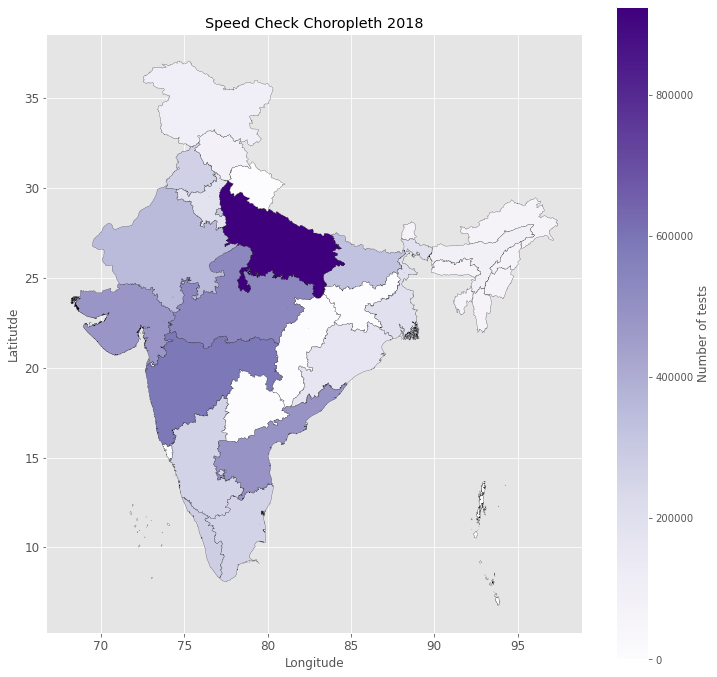

In [29]:
speed_check_chloropleth(df_18, india, 'Speed Check Choropleth 2018')
plt.savefig('spd_chk_2018', bbox_inches='tight')

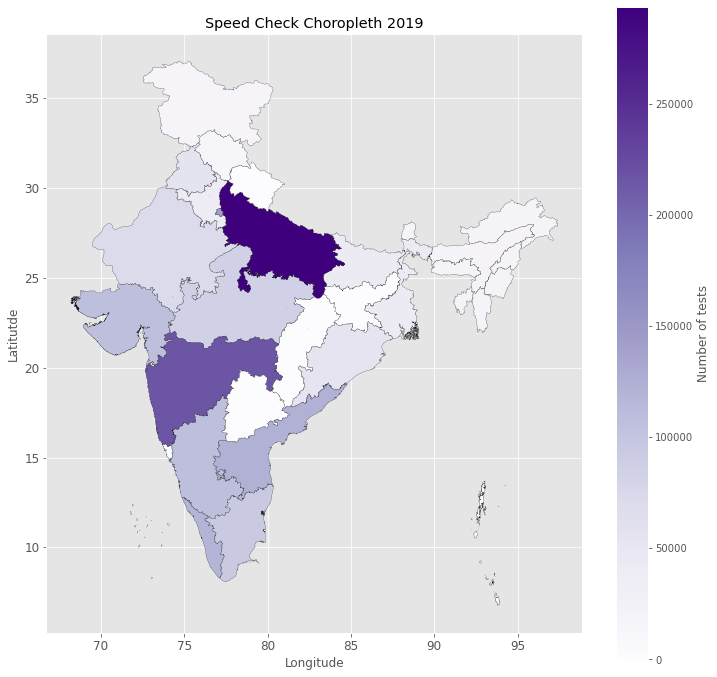

In [30]:
speed_check_chloropleth(df_19, india, 'Speed Check Choropleth 2019')
plt.savefig('spd_chk_2019', bbox_inches='tight')

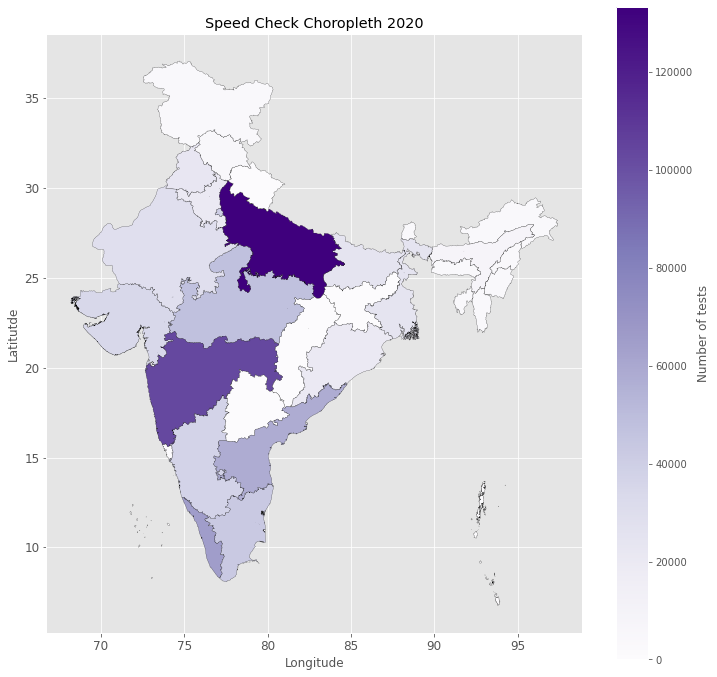

In [31]:
speed_check_chloropleth(df_20, india, 'Speed Check Choropleth 2020')
plt.savefig('spd_chk_2020', bbox_inches='tight')

### Share of Tests among TSPS

In [32]:
tsp = df_20.tsp.value_counts()*100/df_20.tsp.value_counts().sum()

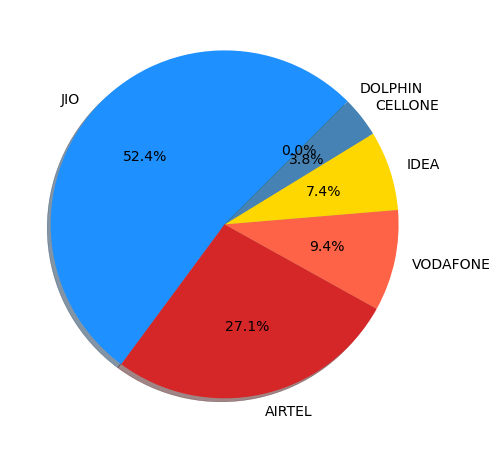

In [33]:
fig, ax = plt.subplots(figsize=[8,8])

labels = tsp.index
values = tsp.values
colors = ['dodgerblue','tab:red','tomato','gold','steelblue','forestgreen']

patches, texts, autotexts = plt.pie(values, labels=labels, colors=colors,
                                  autopct='%.1f%%', shadow=True, startangle=45)

for text, autotext in zip(texts, autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.savefig('tsp_share_2020', bbox_inches='tight')
plt.show()


In [34]:
df_20.test_type.value_counts()*100/df_20.test_type.value_counts().sum()

upload      50.113883
download    49.886117
Name: test_type, dtype: float64

### Share of Tests among Type of Tests 

In [35]:
test = df_20
test['chk'] = 1

/Users/anirudhchandra/anaconda3/envs/machine_learning/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
test_type = pd.pivot_table(test, values='chk', index='tsp', columns='test_type', aggfunc=np.sum)
test_type['total'] = test_type.sum(axis=1)
test_type['download'] = (test_type['download']*100/test_type['total']).round()
test_type['upload'] = (test_type['upload']*100/test_type['total']).round()
test_type

test_type,download,upload,total
tsp,,,
AIRTEL,50.0,50.0,210244
CELLONE,49.0,51.0,29227
DOLPHIN,50.0,50.0,2
IDEA,50.0,50.0,57593
JIO,50.0,50.0,407007
VODAFONE,50.0,50.0,73043


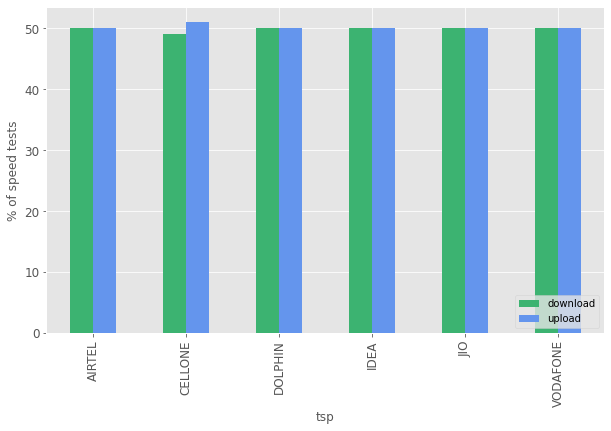

In [37]:
fig,ax = plt.subplots(figsize=[16,7])
test_type[['download','upload']].plot(kind='bar', figsize=[10,6], ax=ax, color=['mediumseagreen','cornflowerblue'])
ax.set_ylabel('% of speed tests', fontsize=12)
ax.tick_params(labelsize=12)
ax.legend(loc='lower right')
plt.savefig('type_test_2020_share', bbox_inches='tight')

## Analysis of Variation in Data Speed

In [38]:
mean_speeds_18 = pd.pivot_table(df_18, values='data_speed', index='tsp',columns=['month'], aggfunc=np.mean).round()
mean_speeds_19 = pd.pivot_table(df_19, values='data_speed', index='tsp',columns=['month'], aggfunc=np.mean).round()
mean_speeds_20 = pd.pivot_table(df_20, values='data_speed', index='tsp',columns=['month'], aggfunc=np.mean).round()

In [39]:
mean_speeds_18 = mean_speeds_18[['March','April','May','June','July']].drop(index=['AIRCEL','UNINOR'])
mean_speeds_19 = mean_speeds_19[['March','April','May','June','July']]
mean_speeds_20 = mean_speeds_20[['March','April','May','June']]

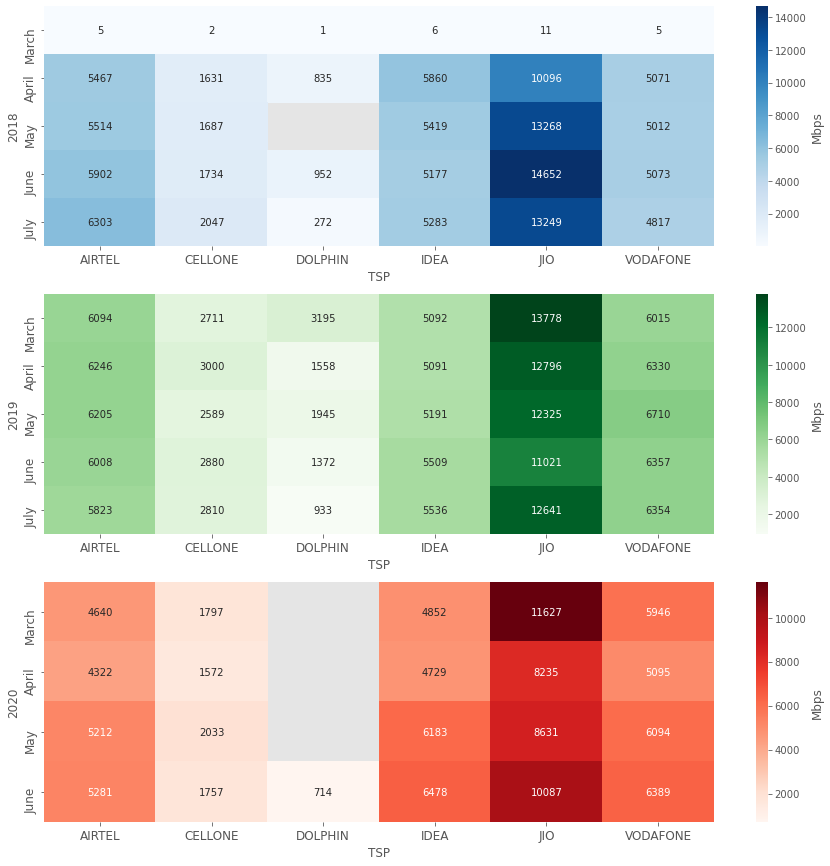

In [40]:
fig,ax = plt.subplots(3,1, figsize=[15,15])

sns.heatmap(mean_speeds_18.transpose(), cmap='Blues', 
            annot=True, fmt='0.0f', cbar_kws={'label':'Mbps'}, ax=ax[0])
ax[0].set_ylabel('2018', fontsize=12)
ax[0].set_xlabel('TSP')
ax[0].tick_params(labelsize=12)

sns.heatmap(mean_speeds_19.transpose(), cmap='Greens', 
            annot=True, fmt='0.0f', cbar_kws={'label':'Mbps'}, ax=ax[1])
ax[1].set_ylabel('2019', fontsize=12)
ax[1].set_xlabel('TSP')
ax[1].tick_params(labelsize=12)

sns.heatmap(mean_speeds_20.transpose(), cmap='Reds', 
            annot=True, fmt='0.0f', cbar_kws={'label':'Mbps'}, ax=ax[2])
ax[2].set_ylabel('2020', fontsize=12)
ax[2].set_xlabel('TSP')
ax[2].tick_params(labelsize=12)

plt.savefig('heatmap_avg_data_speed', bbox_inches='tight')

### Year-on-year Analysis

In [41]:
labels = ['March 2018','April 2018', 'May 2018', 'June 2018',
          'March 2019','April 2019', 'May 2019', 'June 2019',
          'March 2020','April 2020', 'May 2020', 'June 2020']
months = ['March','April','May','June']
tsps   = ['AIRTEL', 'CELLONE', 'DOLPHIN', 'IDEA', 'JIO', 'VODAFONE']

tempdf = pd.pivot_table(df, values='data_speed', 
                            index=['year','month'],
                            columns='tsp', 
                            aggfunc=np.mean).round().drop(columns=['AIRCEL','UNINOR'])

output = pd.DataFrame([], columns=tsps, index=labels)

for month in months:
    try:
        index1 = str(month) + ' 2018'
        index2 = str(month) + ' 2019'
        index3 = str(month) + ' 2020'

        v1 =  tempdf.loc[2018,month]
        v2 = (tempdf.loc[2019,month] - tempdf.loc[2018,month])*100/(tempdf.loc[2018,month])
        v3 = (tempdf.loc[2020,month] - tempdf.loc[2019,month])*100/(tempdf.loc[2019,month])

        output.loc[index1] =  v1.values
        output.loc[index2] =  v2.values
        output.loc[index3] =  v3.values
        
    except KeyError:
        continue

In [42]:
output = output.iloc[5:,:]

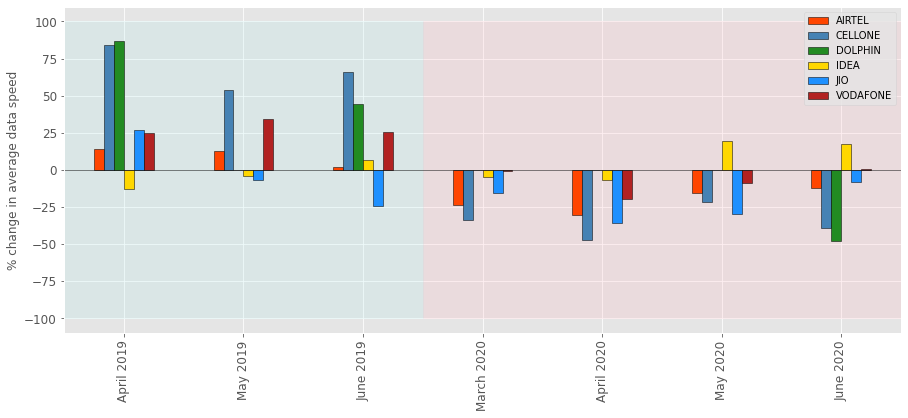

In [43]:
fig,ax = plt.subplots(figsize=[15,6])
colors = ['orangered','steelblue','forestgreen','gold','dodgerblue', 'firebrick']
output.plot(kind='bar', ax=ax, color=colors, edgecolor='k')
plt.hlines(0,-1,10,color='k',linewidth=0.5)
plt.tick_params(labelsize=12)
plt.ylabel('% change in average data speed', fontsize=12)

plt.fill_between([-1,2.5], -100, 100, alpha=0.2, color='paleturquoise') #2019
plt.fill_between([2.5,10], -100, 100, alpha=0.2, color='lightpink') #2020

plt.savefig('yearly_tsp_variation', bbox_inches='tight')

### Distribution of Speeds

In [44]:
testing = df_20

In [45]:
testing

,tsp,tech,test_type,data_speed,signal_strength,lsa,year,month,chk
1259516,JIO,4G,upload,68.0,-100.0,Haryana,2020,March,1
1259517,JIO,4G,upload,55.0,-97.0,Haryana,2020,March,1
1259518,JIO,4G,upload,327.0,-97.0,Haryana,2020,March,1
1259519,JIO,4G,upload,41.0,-97.0,Haryana,2020,March,1
1259520,JIO,4G,upload,31.0,-101.0,Haryana,2020,March,1
...,...,...,...,...,...,...,...,...,...
7664594,AIRTEL,4G,upload,4788.0,-83.0,Rajasthan,2020,June,1
7664595,JIO,4G,upload,2202.0,-91.0,Maharashtra,2020,June,1
7664596,JIO,4G,upload,938.0,-96.0,Maharashtra,2020,June,1
7664597,JIO,4G,upload,4652.0,-79.0,Maharashtra,2020,June,1


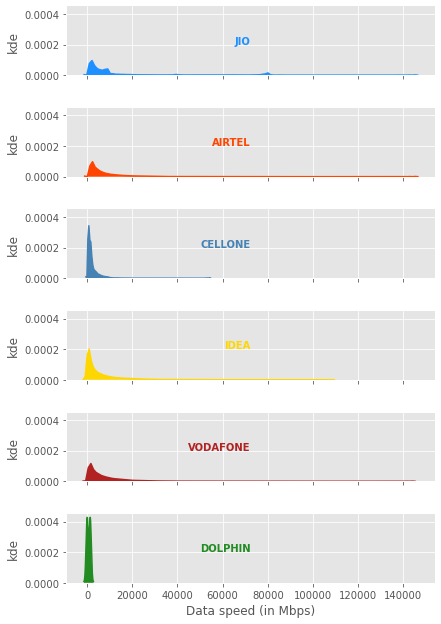

In [46]:
pal = {'JIO':'dodgerblue', 
       'AIRTEL':'orangered', 
       'CELLONE':'steelblue', 
       'IDEA':'gold', 
       'VODAFONE':'firebrick',
       'DOLPHIN':'forestgreen'}

grid = sns.FacetGrid(testing, row='tsp', row_order=pd.unique(testing.tsp), 
                     palette=pal, hue='tsp', height=1.5, aspect=4)

grid.map(sns.kdeplot, 'data_speed', clip_on=False, shade=True, alpha=1)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, 0.5, label, fontweight='bold',
            color=color, ha="right", va="center", transform=ax.transAxes)

grid.map(label, 'tsp')
grid.set_axis_labels('Data speed (in Mbps)', 'kde')
grid.set_titles("")

plt.savefig('tsp_speed_dist', bbox_inches='tight')

In [47]:
tsps   = ['AIRTEL', 'CELLONE', 'DOLPHIN', 'IDEA', 'JIO', 'VODAFONE']
for tsp in tsps:
    var = df_20.loc[df_20.tsp==tsp].data_speed.value_counts(bins=50)
    print('The most commonly offered data speed by {} is = {}'.format(tsp, var.index[0]))

The most commonly offered data speed by AIRTEL is = (-145.346, 2906.9]
The most commonly offered data speed by CELLONE is = (-54.168, 1083.34]
The most commonly offered data speed by DOLPHIN is = (1374.5, 1402.0]
The most commonly offered data speed by IDEA is = (-107.66600000000001, 2153.3]
The most commonly offered data speed by JIO is = (-145.0, 2899.98]
The most commonly offered data speed by VODAFONE is = (-143.341, 2866.8]


### State-wise TSP during Lockdown

In [48]:
plotdf = df_20[['tsp','test_type','data_speed','lsa', 'year']]

In [49]:
plotdf.loc[plotdf.lsa=='Orissa', 'lsa'] = 'Odisha'
plotdf.loc[plotdf.lsa=='UP East', 'lsa'] = 'Uttar Pradesh'
plotdf.loc[plotdf.lsa=='UP West', 'lsa'] = 'Uttar Pradesh'

/Users/anirudhchandra/anaconda3/envs/machine_learning/lib/python3.6/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


#### **Pivoting by Year (All lockdown months average in 2020)**

**Defining function to plot average download and upload speeds choropleths**

In [50]:
def avg_speed_choropleth(df, india, test_type, cmap, title):
    
    av_speed = pd.pivot_table(df, values='data_speed', index='lsa', columns=['year','test_type'], aggfunc=np.mean).round()
    
    #Imputing average data speed to geopandas dataframe
    for state in india.st_nm:
        try:
            india.loc[india.st_nm==state, 'mean_speed_2020'] = av_speed.loc[state, (2020,test_type)]

        except KeyError:
                
            try:
                exception1 = ((state=='Arunanchal Pradesh')|(state=='Assam')|(state=='Manipur')|
                             (state=='Meghalaya')|(state=='Mizoram')|(state=='Nagaland')|
                             (state=='Sikkim')|(state=='Tripura'))
                exception2 = (state=='NCT of Delhi')

                if exception1:
                    india.loc[india.st_nm==state, 'mean_speed_2020'] = av_speed.loc['North East', (2020,test_type)]
                elif exception2:
                    india.loc[india.st_nm==state, 'mean_speed_2020'] = av_speed.loc['Delhi', (2020,test_type)]

                else:
                    continue
            except:
                continue
                
    india = india.fillna(0)
    
    # Plotting chloropleth
    variable = 'mean_speed_2020'
    vmin, vmax = 0, 10000
    fig,ax = plt.subplots(figsize=[12,12])
    
    # Create colorbar legend
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

    # Add the colorbar to the figure
    fig.colorbar(sm, label='Mbps')
    india.plot(column=variable, cmap= cmap,
                   linewidth=0.2, edgecolor='k', ax=ax)
    plt.title(title)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitutde', fontsize=12)
    plt.tick_params(labelsize=12)

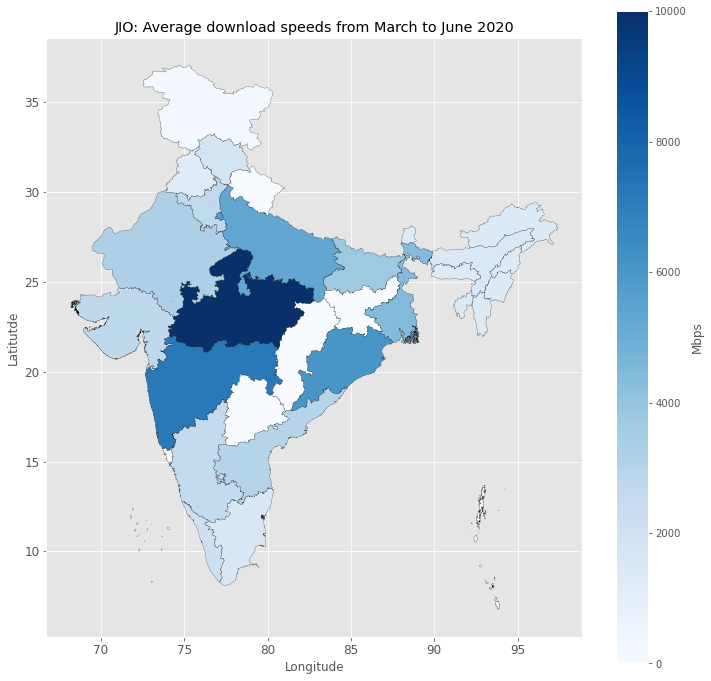

In [51]:
avg_speed_choropleth(plotdf.loc[plotdf.tsp=='JIO'], india, 'download', 'Blues', 'JIO: Average download speeds from March to June 2020')

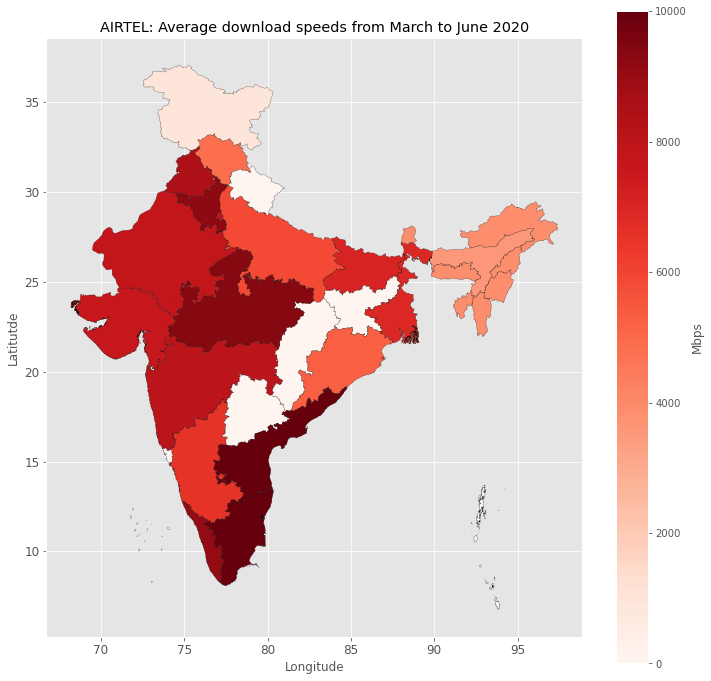

In [52]:
avg_speed_choropleth(plotdf.loc[plotdf.tsp=='AIRTEL'], india, 'download', 'Reds', 'AIRTEL: Average download speeds from March to June 2020')

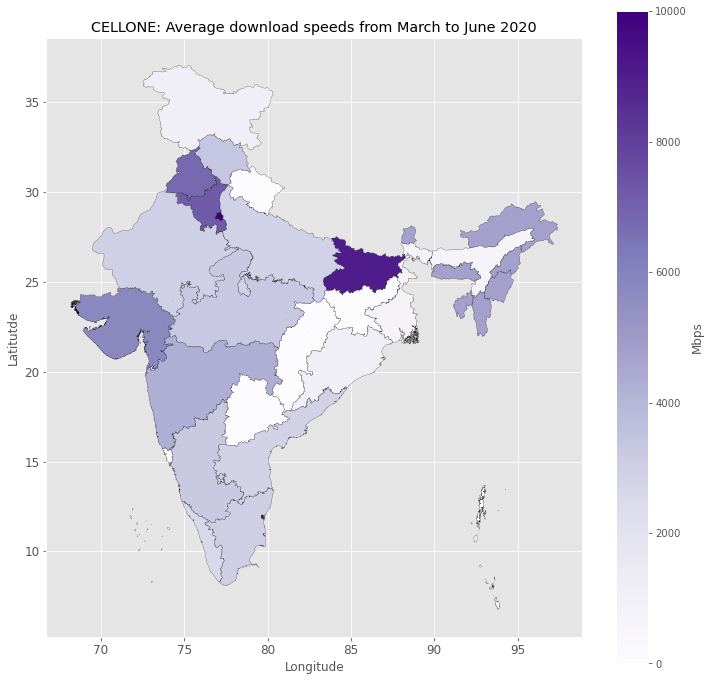

In [53]:
avg_speed_choropleth(plotdf.loc[plotdf.tsp=='CELLONE'], india, 'download', 'Purples', 'CELLONE: Average download speeds from March to June 2020')

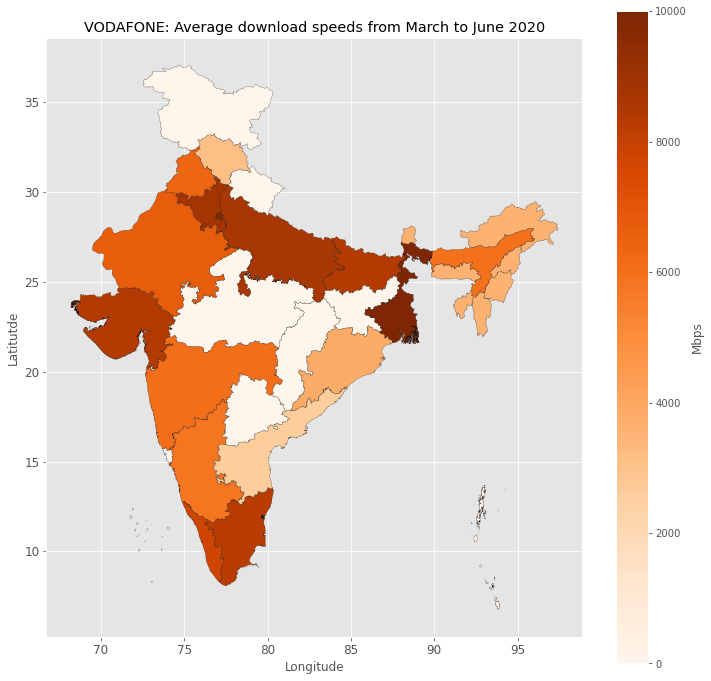

In [54]:
avg_speed_choropleth(plotdf.loc[plotdf.tsp=='VODAFONE'], india, 'download', 'Oranges', 'VODAFONE: Average download speeds from March to June 2020')

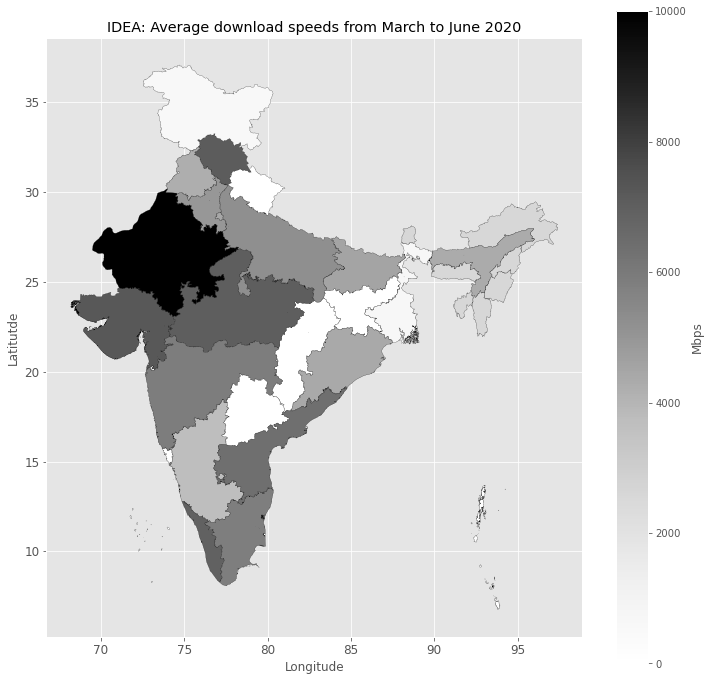

In [55]:
avg_speed_choropleth(plotdf.loc[plotdf.tsp=='IDEA'], india, 'download', 'Greys', 'IDEA: Average download speeds from March to June 2020')

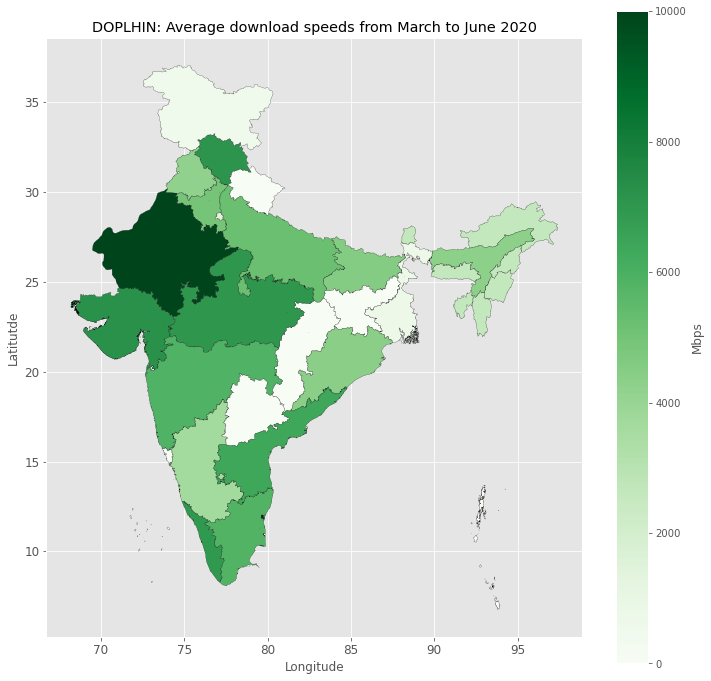

In [56]:
avg_speed_choropleth(plotdf.loc[plotdf.tsp=='DOLPHIN'], india, 'download', 'Greens', 'DOPLHIN: Average download speeds from March to June 2020')